In [1]:
# importing required packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Loading the data

df = pd.read_csv(r"D:\Nivash\Data Analytics\Python\Datasets\Project 2 descriptions\Laptop Dataset\laptopData.csv")

## Data Understanding

The laptop dataset comprises various attributes related to __laptops__, including manufacturer,specifications, and pricing information. The goal of this project is to conduct a comprehensive analysis of the dataset to derive insights into laptop characteristics, performance, and pricing,catering to both consumers and manufacturers in the computer industry.
 currency.

__Details :__
1. __Company__: The manufacturer or brand of the laptop.
2. __TypeName__: The type or category of the laptop (e.g., gaming, ultrabook).
3. __Inches__: The size of the laptop screen in inches.
4. __ScreenResolution__: The resolution and display technology of the laptop screen.
5. __Cpu__: The processor (CPU) model of the laptop.
6. __Ram__: The amount of Random Access Memory (RAM) in the laptop.
7. __Memory__: The storage capacity (hard drive or SSD) of the laptop.
8. __Gpu__: The graphics processor (GPU) model of the laptop.
9. __OpSys__: The operating system installed on the laptop.
10. __Weight__: The weight of the laptop in kilograms.
11. __Price__: The price of the laptop in the local currency.

## Data Cleaning

In [4]:
# Checking the datatypes avail in the dataset

df.dtypes

Unnamed: 0          float64
Company              object
TypeName             object
Inches               object
ScreenResolution     object
Cpu                  object
Ram                  object
Memory               object
Gpu                  object
OpSys                object
Weight               object
Price               float64
dtype: object

In [5]:
# getting the shape of the dataset

df.shape

(1303, 12)

In [6]:
# Droping the empty rows in the dataset

df = df.dropna(how='all')

In [7]:
df

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0.0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1.0,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2.0,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3.0,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4.0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080
...,...,...,...,...,...,...,...,...,...,...,...,...
1298,1298.0,Lenovo,2 in 1 Convertible,14,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,33992.6400
1299,1299.0,Lenovo,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,79866.7200
1300,1300.0,Lenovo,Notebook,65.4,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2GB,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,12201.1200
1301,1301.0,HP,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6GB,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19kg,40705.9200


In [8]:
# Checking the shape after dropping the empty rows in the dataset

df.shape

(1273, 12)

In [9]:
# Checking if any null values present in the dataset over columnn wise

df.isnull().sum()

Unnamed: 0           0
Company              0
TypeName            20
Inches              53
ScreenResolution     0
Cpu                  0
Ram                 14
Memory               0
Gpu                  0
OpSys                0
Weight              14
Price                0
dtype: int64

In [10]:
# Dropping the unneccessary column 'Unnamed: 0'

df = df.drop('Unnamed: 0',axis=1)

In [11]:
df

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080
...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,14,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,33992.6400
1299,Lenovo,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,79866.7200
1300,Lenovo,Notebook,65.4,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2GB,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,12201.1200
1301,HP,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6GB,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19kg,40705.9200


In [12]:
# Dropping the rows having null values in Column "TypeName"

df = df.dropna(subset=['TypeName'])

In [13]:
df

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080
...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,14,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,33992.6400
1299,Lenovo,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,79866.7200
1300,Lenovo,Notebook,65.4,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2GB,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,12201.1200
1301,HP,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6GB,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19kg,40705.9200


In [14]:
# Imputing the missing values with mode value for columns 'Inches','Ram','Weight'

fill = ['Inches','Ram','Weight']

# Using for loop to impute missing values

for i in fill:
    df[i] = df[i].fillna(df[i].mode()[0])

In [15]:
df.isnull().sum()

Company             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price               0
dtype: int64

In [16]:
df

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080
...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,14,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,33992.6400
1299,Lenovo,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,79866.7200
1300,Lenovo,Notebook,65.4,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2GB,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,12201.1200
1301,HP,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6GB,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19kg,40705.9200


In [17]:
# Changing the column 'Ram' from to object to int

df['Ram'] = df['Ram'].apply(lambda x: int(x.rstrip('GB')))

In [18]:
# Checking that 'Ram' changed to int

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1253 entries, 0 to 1302
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1253 non-null   object 
 1   TypeName          1253 non-null   object 
 2   Inches            1253 non-null   object 
 3   ScreenResolution  1253 non-null   object 
 4   Cpu               1253 non-null   object 
 5   Ram               1253 non-null   int64  
 6   Memory            1253 non-null   object 
 7   Gpu               1253 non-null   object 
 8   OpSys             1253 non-null   object 
 9   Weight            1253 non-null   object 
 10  Price             1253 non-null   float64
dtypes: float64(1), int64(1), object(9)
memory usage: 117.5+ KB


In [19]:
# Getting the unique values of column 'Inches'

df['Inches'].unique()

array(['13.3', '15.6', '15.4', '14', '12', '17.3', '13.5', '12.5', '13',
       '18.4', '13.9', '11.6', '25.6', '35.6', '12.3', '27.3', '24',
       '33.5', '?', '31.6', '17', '15', '14.1', '11.3', '88.1', '21.8',
       '10.1', '75.7', '8.4', '2.1', '111.8', '89.2', '65.4'],
      dtype=object)

In [20]:
# Replacing that '?' with mode value

df['Inches'] = df['Inches'].replace('?',df['Inches'].mode()[0])

In [21]:
# Changing the column 'Inches' from to object to float

df['Inches'] = df['Inches'].apply(lambda x: float(x))

In [22]:
# Checking that 'Inches' changed to float

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1253 entries, 0 to 1302
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1253 non-null   object 
 1   TypeName          1253 non-null   object 
 2   Inches            1253 non-null   float64
 3   ScreenResolution  1253 non-null   object 
 4   Cpu               1253 non-null   object 
 5   Ram               1253 non-null   int64  
 6   Memory            1253 non-null   object 
 7   Gpu               1253 non-null   object 
 8   OpSys             1253 non-null   object 
 9   Weight            1253 non-null   object 
 10  Price             1253 non-null   float64
dtypes: float64(2), int64(1), object(8)
memory usage: 117.5+ KB


In [23]:
# In column 'Weight' there is a character '?' present.So,replacing it with mode value 

df['Weight'] = df['Weight'].replace('?',df['Weight'].mode()[0])

In [24]:
# In column 'Weight' there is a character '?' present.So, removing it

df['Weight'] = df['Weight'].apply(lambda x: x.rstrip('Kkg'))

In [25]:
# Checking that 'Weight' changed to float

df['Weight'].unique()

array(['1.37', '1.34', '1.86', '1.83', '2.1', '2.04', '1.3', '1.6', '2.2',
       '0.92', '1.22', '2.5', '1.62', '1.91', '2.3', '1.35', '1.88',
       '1.89', '1.65', '2.71', '1.2', '1.44', '2.8', '2', '2.65', '2.77',
       '3.2', '1.49', '2.4', '2.13', '2.43', '1.7', '1.4', '1.8', '1.9',
       '3', '1.252', '2.7', '2.02', '1.63', '1.96', '1.21', '2.45',
       '1.25', '1.5', '2.62', '1.38', '1.58', '1.85', '1.23', '2.16',
       '2.36', '7.2', '2.05', '1.32', '1.75', '0.97', '2.56', '1.48',
       '1.74', '1.1', '1.56', '2.03', '1.05', '5.4', '4.4', '1.90',
       '1.29', '2.0', '1.95', '2.06', '1.12', '3.49', '3.35', '2.23',
       '2.9', '4.42', '2.69', '2.37', '4.7', '3.6', '2.08', '4.3', '1.68',
       '1.41', '4.14', '2.18', '2.24', '2.67', '4.1', '2.14', '1.36',
       '2.25', '2.15', '2.19', '2.54', '3.42', '5.8', '1.28', '2.33',
       '1.45', '2.79', '8.23', '1.26', '0.0002', '1.84', '2.6', '2.26',
       '3.25', '11.5', '1.13', '1.42', '0.00008', '1.78', '1.10', '22.1',
  

In [26]:
# Converting the column 'weight' from object to float

df['Weight'] = df['Weight'].apply(lambda x: float(x))

In [27]:
# Rounding off the 'Prices' to 2 decimal points

df['Price'] = df['Price'].apply(lambda x: round(x,2))

In [28]:
df

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.68
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.52
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.00
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.34
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.81
...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4,128GB SSD,Intel HD Graphics 520,Windows 10,1.80,33992.64
1299,Lenovo,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16,512GB SSD,Intel HD Graphics 520,Windows 10,1.30,79866.72
1300,Lenovo,Notebook,65.4,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2,64GB Flash Storage,Intel HD Graphics,Windows 10,1.50,12201.12
1301,HP,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19,40705.92


In [29]:
# Checking the 'OpSys' column

df['OpSys'].unique()

array(['macOS', 'No OS', 'Windows 10', 'Mac OS X', 'Linux',
       'Windows 10 S', 'Chrome OS', 'Windows 7', 'Android'], dtype=object)

In [30]:
# So,replacing that 'No OS' with mode values

df['OpSys'] = df['OpSys'].replace('No OS',df['OpSys'].mode()[0])

In [31]:
df['OpSys'].unique()

array(['macOS', 'Windows 10', 'Mac OS X', 'Linux', 'Windows 10 S',
       'Chrome OS', 'Windows 7', 'Android'], dtype=object)

## Feature Engineering

In [32]:
# Define a function to extract the CPU manufacturer using regular expressions
def extract_manufacturer(Cpu):
    match = re.match(r'^(Intel|AMD|Samsung)', Cpu)
    if match:
        return match.group(1)
    else:
        return None

# Apply the function to create the 'Cpu Type' column
df['Cpu_manufacturer'] = df['Cpu'].apply(extract_manufacturer)

In [33]:
df

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Cpu_manufacturer
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.68,Intel
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.52,Intel
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,Windows 10,1.86,30636.00,Intel
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.34,Intel
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.81,Intel
...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4,128GB SSD,Intel HD Graphics 520,Windows 10,1.80,33992.64,Intel
1299,Lenovo,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16,512GB SSD,Intel HD Graphics 520,Windows 10,1.30,79866.72,Intel
1300,Lenovo,Notebook,65.4,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2,64GB Flash Storage,Intel HD Graphics,Windows 10,1.50,12201.12,Intel
1301,HP,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19,40705.92,Intel


In [34]:
df['Cpu_manufacturer'].unique()

array(['Intel', 'AMD', 'Samsung'], dtype=object)

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1253 entries, 0 to 1302
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1253 non-null   object 
 1   TypeName          1253 non-null   object 
 2   Inches            1253 non-null   float64
 3   ScreenResolution  1253 non-null   object 
 4   Cpu               1253 non-null   object 
 5   Ram               1253 non-null   int64  
 6   Memory            1253 non-null   object 
 7   Gpu               1253 non-null   object 
 8   OpSys             1253 non-null   object 
 9   Weight            1253 non-null   float64
 10  Price             1253 non-null   float64
 11  Cpu_manufacturer  1253 non-null   object 
dtypes: float64(3), int64(1), object(8)
memory usage: 127.3+ KB


## Checking Outliers

In [36]:
# Selecting the 'int'and 'float' datatype columns and storing it in new variable

numeric_columns = df.select_dtypes(include=['int','float'])

In [37]:
numeric_columns

,Inches,Ram,Weight,Price
0,13.3,8,1.37,71378.68
1,13.3,8,1.34,47895.52
2,15.6,8,1.86,30636.00
3,15.4,16,1.83,135195.34
4,13.3,8,1.37,96095.81
...,...,...,...,...
1298,14.0,4,1.80,33992.64
1299,13.3,16,1.30,79866.72
1300,65.4,2,1.50,12201.12
1301,15.6,6,2.19,40705.92


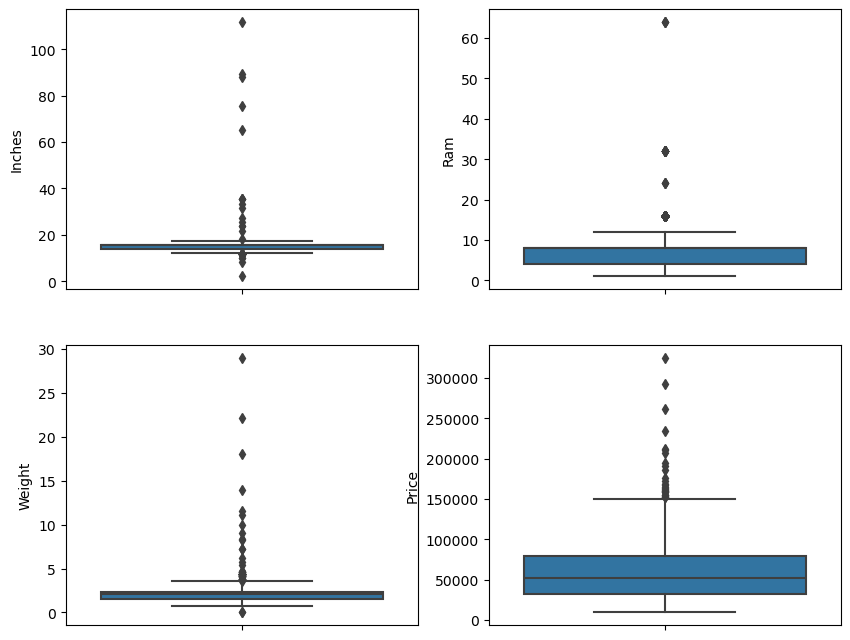

In [38]:
# Boxplots are plotted for numeric columns to check outliers

plt.figure(figsize=(10,8))
for i in range(len(numeric_columns.columns)):
    plt.subplot(2,2,i+1)
    sns.boxplot(y = numeric_columns.columns[i], data = df)
plt.show()

In [39]:
# Statistical summary of column 'Inches'

df['Inches'].describe()

count    1253.000000
mean       15.427694
std         4.989467
min         2.100000
25%        14.000000
50%        15.600000
75%        15.600000
max       111.800000
Name: Inches, dtype: float64

In [40]:
# Defing a function to calculate the different quantiles before lower-whisk

def lower_whisk(dataFrame,column):
    print("0% :",dataFrame[column].quantile(0.00))
    print("1% :",dataFrame[column].quantile(0.01))
    print("3% :",dataFrame[column].quantile(0.03))
    print("5% :",dataFrame[column].quantile(0.05))
    print("7% :",dataFrame[column].quantile(0.07))
    print("10% :",dataFrame[column].quantile(0.10))
    print("13% :",dataFrame[column].quantile(0.13))
    print("15% :",dataFrame[column].quantile(0.15))
    print("18% :",dataFrame[column].quantile(0.18))
    print("20% :",dataFrame[column].quantile(0.20))
    return

In [41]:
# Defing a function to calculate the different quantiles after upper-whisk

def upper_whisk(dataFrame,column):
    print("80% :",dataFrame[column].quantile(0.80))
    print("85% :",dataFrame[column].quantile(0.85))
    print("90% :",dataFrame[column].quantile(0.90))
    print("93% :",dataFrame[column].quantile(0.93))
    print("95% :",dataFrame[column].quantile(0.95))
    print("97% :",dataFrame[column].quantile(0.97))
    print("98% :",dataFrame[column].quantile(0.98))
    print("99% :",dataFrame[column].quantile(0.99))
    print("100% :",dataFrame[column].quantile(1.00))
    return

In [42]:
# Check at which percentile the value distorts more, so that we can remove the outliers

upper_whisk(df,'Inches')

80% : 15.6
85% : 15.6
90% : 17.3
93% : 17.3
95% : 17.3
97% : 17.3
98% : 17.3
99% : 24.0
100% : 111.8


In [43]:
# The value distorts more at 100%, so lets drop the records where "Inches" > 24.0

df = df[~(df["Inches"]>24.0)]
df

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Cpu_manufacturer
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.68,Intel
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.52,Intel
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,Windows 10,1.86,30636.00,Intel
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.34,Intel
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.81,Intel
...,...,...,...,...,...,...,...,...,...,...,...,...
1297,Asus,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,4,500GB HDD,Nvidia GeForce 920M,Windows 10,2.20,38378.65,Intel
1298,Lenovo,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4,128GB SSD,Intel HD Graphics 520,Windows 10,1.80,33992.64,Intel
1299,Lenovo,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16,512GB SSD,Intel HD Graphics 520,Windows 10,1.30,79866.72,Intel
1301,HP,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19,40705.92,Intel


In [44]:
# defining function for calculating IQR

def calculate_IQR(df,column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR=Q3-Q1
    LW = Q1-(1.5*IQR)
    UW = Q3+(1.5*IQR)
    df = df[~(df[column]<LW)]
    df = df[~(df[column]>UW)]
    return df

In [45]:
# Check at which percentile the value distorts more, so that we can remove the outliers

upper_whisk(df,'Weight')

80% : 2.5
85% : 2.62
90% : 2.8
93% : 3.0
95% : 3.35
97% : 4.279999999999995
98% : 4.42
99% : 5.639999999999963
100% : 29.0


In [46]:
# The value distorts more at 100%, so lets drop the records where "Weight" > 6.0

df = df[~(df["Weight"]>6.0)]
df

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Cpu_manufacturer
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.68,Intel
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.52,Intel
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,Windows 10,1.86,30636.00,Intel
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.34,Intel
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.81,Intel
...,...,...,...,...,...,...,...,...,...,...,...,...
1297,Asus,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,4,500GB HDD,Nvidia GeForce 920M,Windows 10,2.20,38378.65,Intel
1298,Lenovo,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4,128GB SSD,Intel HD Graphics 520,Windows 10,1.80,33992.64,Intel
1299,Lenovo,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16,512GB SSD,Intel HD Graphics 520,Windows 10,1.30,79866.72,Intel
1301,HP,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19,40705.92,Intel


In [47]:
# Check at which percentile the value distorts more, so that we can remove the outliers

upper_whisk(df,'Price')

80% : 87880.032
85% : 97406.49599999998
90% : 109041.782
93% : 121601.98839999999
95% : 130002.56
97% : 142029.56159999987
98% : 153231.83200000005
99% : 167970.528
100% : 324954.72


In [48]:
# The value distorts more at 100%, so lets drop the records where "Price" > 167971.00

df = df[~(df["Price"]>167971.00)]
df

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Cpu_manufacturer
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.68,Intel
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.52,Intel
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,Windows 10,1.86,30636.00,Intel
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.34,Intel
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.81,Intel
...,...,...,...,...,...,...,...,...,...,...,...,...
1297,Asus,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,4,500GB HDD,Nvidia GeForce 920M,Windows 10,2.20,38378.65,Intel
1298,Lenovo,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4,128GB SSD,Intel HD Graphics 520,Windows 10,1.80,33992.64,Intel
1299,Lenovo,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16,512GB SSD,Intel HD Graphics 520,Windows 10,1.30,79866.72,Intel
1301,HP,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19,40705.92,Intel


In [49]:
# Grouping the whole dataset wrt to 'Ram' and getting each Ram count

df_grouped = df.groupby(['Ram']).count()
df_grouped

,Company,TypeName,Inches,ScreenResolution,Cpu,Memory,Gpu,OpSys,Weight,Price,Cpu_manufacturer
Ram,,,,,,,,,,,
1,1,1,1,1,1,1,1,1,1,1,1
2,21,21,21,21,21,21,21,21,21,21,21
4,344,344,344,344,344,344,344,344,344,344,344
6,36,36,36,36,36,36,36,36,36,36,36
8,591,591,591,591,591,591,591,591,591,591,591
12,23,23,23,23,23,23,23,23,23,23,23
16,186,186,186,186,186,186,186,186,186,186,186
24,3,3,3,3,3,3,3,3,3,3,3
32,9,9,9,9,9,9,9,9,9,9,9


In [50]:
# We are neglecting the value 1GB(i.e., for only one laptop) because it may be an human error that no laptops are having 1GB of Ram nowadays

df = df[~(df["Ram"]==1)]
df

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Cpu_manufacturer
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.68,Intel
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.52,Intel
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,Windows 10,1.86,30636.00,Intel
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.34,Intel
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.81,Intel
...,...,...,...,...,...,...,...,...,...,...,...,...
1297,Asus,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,4,500GB HDD,Nvidia GeForce 920M,Windows 10,2.20,38378.65,Intel
1298,Lenovo,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4,128GB SSD,Intel HD Graphics 520,Windows 10,1.80,33992.64,Intel
1299,Lenovo,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16,512GB SSD,Intel HD Graphics 520,Windows 10,1.30,79866.72,Intel
1301,HP,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19,40705.92,Intel


# EDA

## Univariate Analysis

<function matplotlib.pyplot.show(close=None, block=None)>

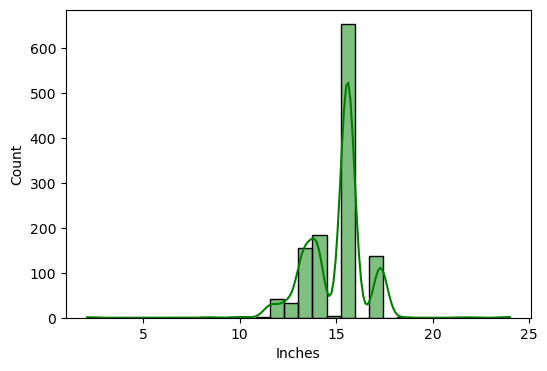

In [51]:
# Exploring the distributions of column 'Inches'

plt.figure(figsize = (6,4))
sns.histplot(df['Inches'],bins=30,color='Green',kde=True)
plt.show

It implies that the __laptop screen size__ in the range of about __16 inches__ having the __more__.

<function matplotlib.pyplot.show(close=None, block=None)>

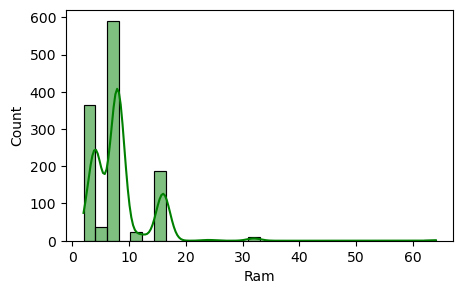

In [52]:
# Exploring the distributions of column 'Ram'

plt.figure(figsize = (5,3))
sns.histplot(df['Ram'],bins=30,color='Green',kde=True)
plt.show

It implies that __8GB Ram__ has the __more number of units__ sold

<function matplotlib.pyplot.show(close=None, block=None)>

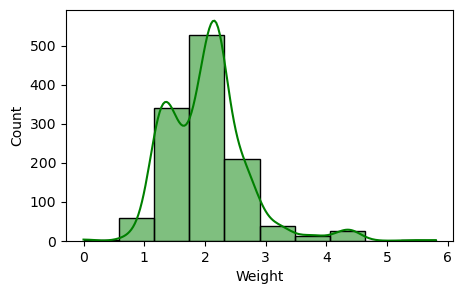

In [53]:
# Exploring the distributions of column 'Weight'

plt.figure(figsize = (5,3))
sns.histplot(df['Weight'],bins=10,color='Green',kde=True)
plt.show

It implies that the __average of Weight__ range from __1.8 to 2.2__ having more distribution

<function matplotlib.pyplot.show(close=None, block=None)>

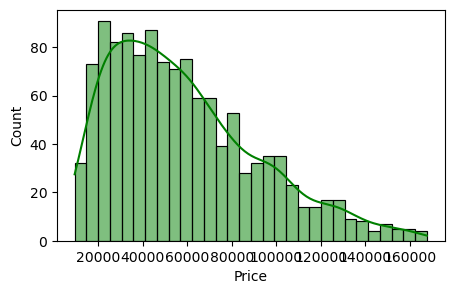

In [54]:
# Exploring the distributions of column 'Prices'

plt.figure(figsize = (5,3))
sns.histplot(df['Price'],bins=30,color='Green',kde=True)
plt.show

From this we can infer that from __low to mid range__ of price has more number of values and when the price is increasing,the number of values decresing

## Segmented Univariate Analysis

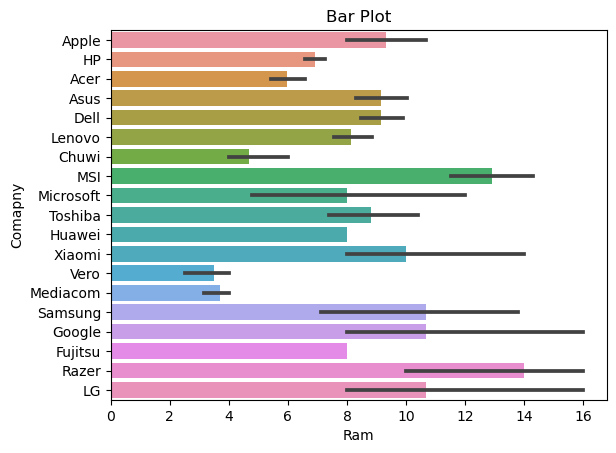

In [55]:
# Using barplot to plot the different 'Ram' wrt 'Commpany'

sns.barplot(x=df['Ram'],y=df['Company'])
plt.title('Bar Plot')
plt.xlabel('Ram')
plt.ylabel('Comapny')
plt.show()

From the above analysis,it is noted that __'Razer' and 'MSI'__ are average selling __high end Ram devices__. 

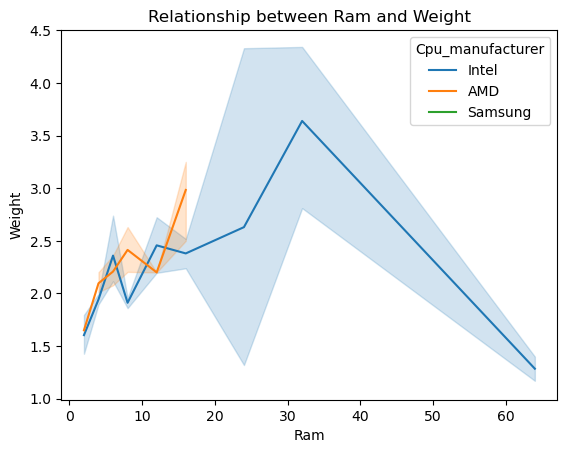

In [56]:
# Using lineplot to find the trend between 'Ram' and 'Weight' wrt 'Cpu_manufacturer'

sns.lineplot(x='Ram',y='Weight',hue='Cpu_manufacturer',data=df)
plt.title('Relationship between Ram and Weight')
plt.xlabel('Ram')
plt.ylabel('Weight')
plt.show()

From this, we can say that the __Intel__ had producing the Ram beyond 16GB and also the laptop having __Intel 32GB Ram__ having the more weight

## Bivariate Analysis

In [57]:
# Making bins for column 'Price' because it more unique values that plot doesn't give any insight.

Price_Bin = pd.cut(df['Price'], bins=10)

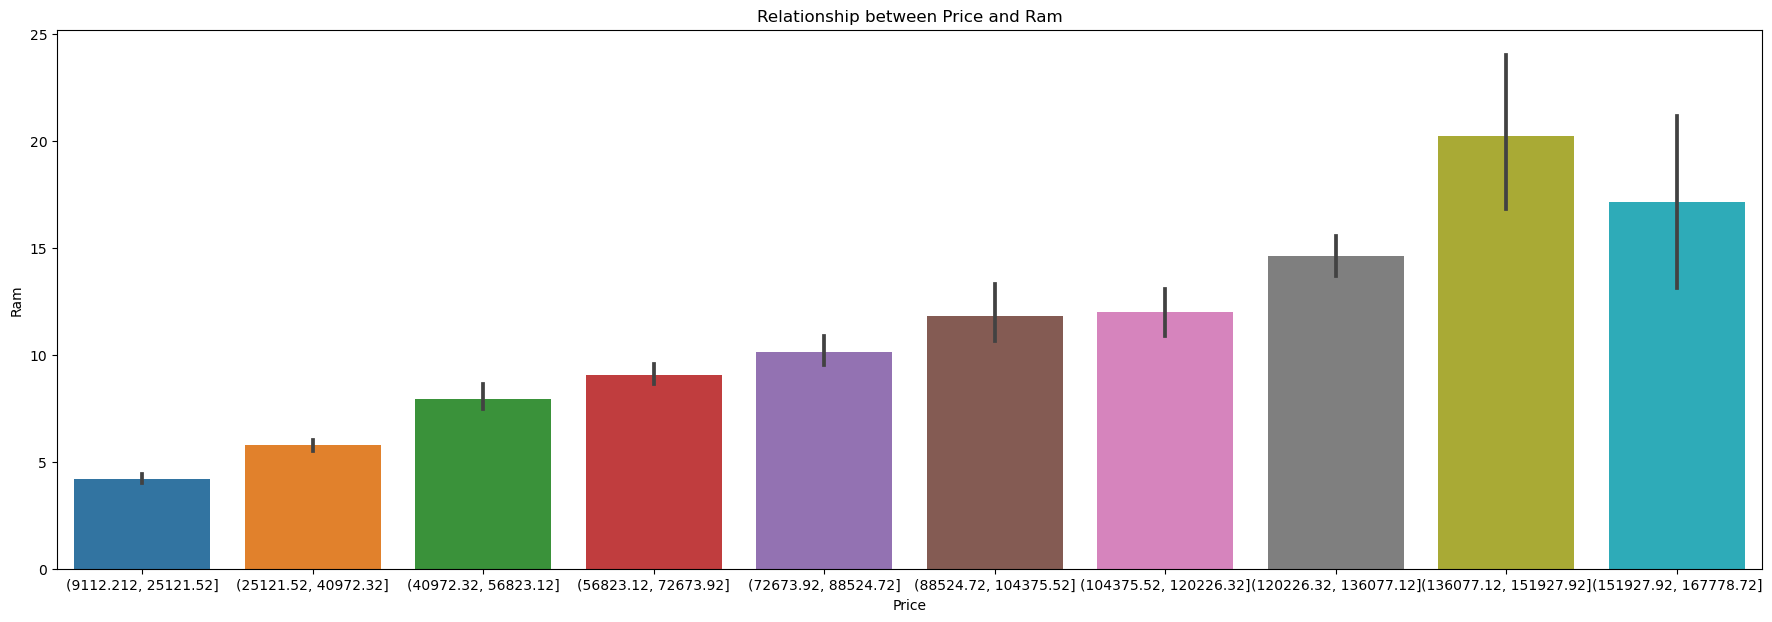

In [58]:
# Checking the relationship between 'price' and 'Ram'

plt.figure(figsize=(22,7))
sns.barplot(x=Price_Bin,y=df['Ram'])
plt.title('Relationship between Price and Ram')
plt.xlabel('Price')
plt.ylabel('Ram')
plt.show()

__Inference :__

   In the price range of __1,36,000 to 1,52,000__, there is a __higher concentration of laptops__ with various RAM configurations.

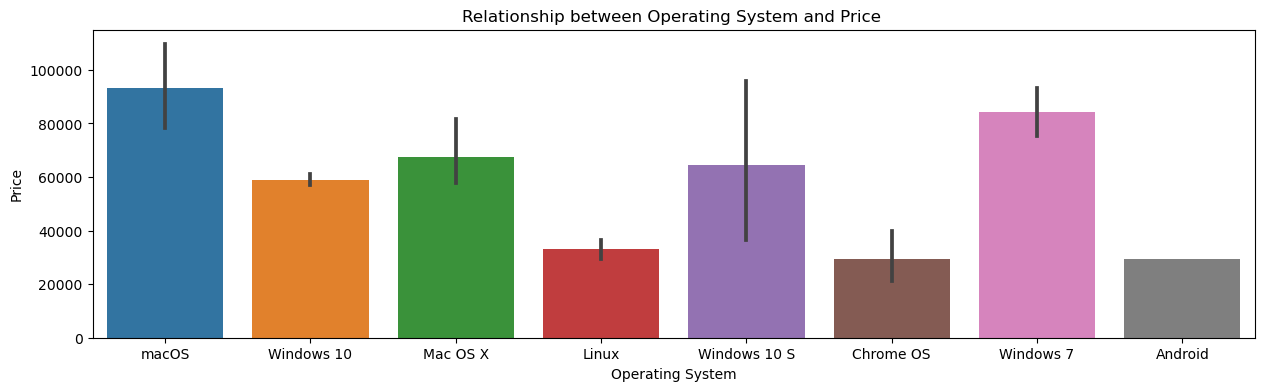

In [59]:
# Checking the relationship between 'price' and 'OpSys'

plt.figure(figsize=(15,4))
sns.barplot(x=df['OpSys'],y=df['Price'])
plt.title('Relationship between Operating System and Price ')
plt.xlabel('Operating System')
plt.ylabel('Price')
plt.show()

__Inference :__

From this we can say that __'MacOS'__ costs more than any other OS.

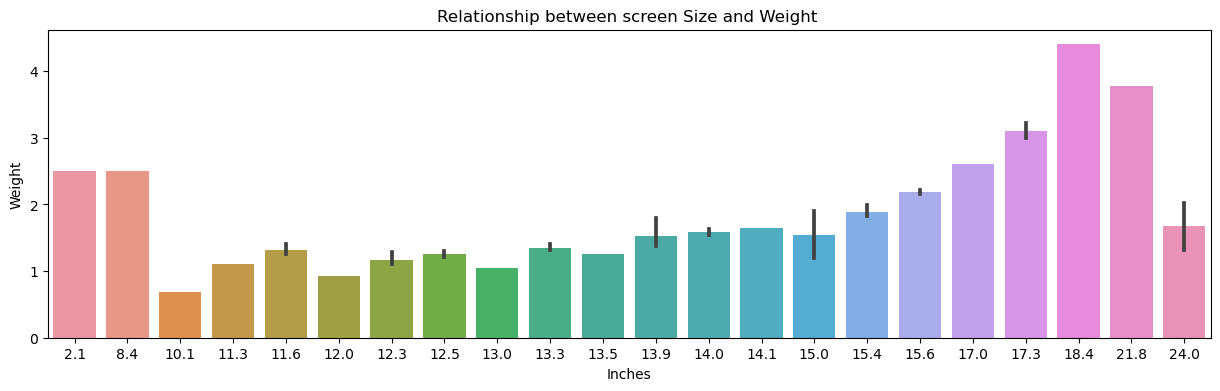

In [60]:
# Checking the relationship between 'Inches' and 'Weight'

plt.figure(figsize=(15,4))
sns.barplot(x=df['Inches'],y=df['Weight'])
plt.title('Relationship between screen Size and Weight ')
plt.xlabel('Inches')
plt.ylabel('Weight')
plt.show()

__Inference :__

It is noted that laptops having screen size around __18.4 inches__  having __more weight__

## Using Testing to find out the highly correlated variables

## Chi-Square Test

In [96]:
# For using chi-sqaure testing categorical variables are required

x=pd.DataFrame(df[['Company','OpSys']])
x

,Company,OpSys
0,Apple,macOS
1,Apple,macOS
2,HP,Windows 10
3,Apple,macOS
4,Apple,macOS
...,...,...
1297,Asus,Windows 10
1298,Lenovo,Windows 10
1299,Lenovo,Windows 10
1301,HP,Windows 10


In [97]:
df['Company'].unique()

array(['Apple', 'HP', 'Acer', 'Asus', 'Dell', 'Lenovo', 'Chuwi', 'MSI',
       'Microsoft', 'Toshiba', 'Huawei', 'Xiaomi', 'Vero', 'Mediacom',
       'Samsung', 'Google', 'Fujitsu', 'Razer', 'LG'], dtype=object)

In [98]:
# Creating a dictionary of company elements

brand_mapping = {'Apple': 1, 'HP': 2, 'Acer': 3, 'Asus': 4, 'Dell': 5,'Lenovo': 6, 'Chuwi': 7, 'MSI': 8, 'Microsoft': 9, 'Toshiba': 10,'Huawei': 11, 
                 'Xiaomi': 12, 'Vero': 13, 'Mediacom': 14,'Samsung': 15, 'Google': 16, 'Fujitsu': 17, 'Razer': 18, 'LG': 19}

# Using the map function to encode the 'Company' column
x['Company'] = x['Company'].map(brand_mapping)


In [99]:
x

,Company,OpSys
0,1,macOS
1,1,macOS
2,2,Windows 10
3,1,macOS
4,1,macOS
...,...,...
1297,4,Windows 10
1298,6,Windows 10
1299,6,Windows 10
1301,2,Windows 10


In [100]:
df['OpSys'].unique()

array(['macOS', 'Windows 10', 'Mac OS X', 'Linux', 'Windows 10 S',
       'Chrome OS', 'Windows 7', 'Android'], dtype=object)

In [101]:
# Creating a dictionary of Operating system elements

os_mapping = {'macOS': 1, 'Windows 10': 2, 'Mac OS X': 3, 'Linux': 4, 'Windows 10 S': 5,'Chrome OS': 6, 'Windows 7': 7, 'Android': 8}

# Using the map function to encode the 'OpSys' column
x['OpSys'] = x['OpSys'].map(os_mapping)


In [102]:
y = pd.DataFrame(df['Cpu_manufacturer'])

In [103]:
df['Cpu_manufacturer'].unique()

array(['Intel', 'AMD', 'Samsung'], dtype=object)

In [104]:
# Creating a dictionary of Cpu_manufacturer elements

cpu_mapping = {'Intel': 1, 'AMD': 2, 'Samsung': 3}

# Using the map function to encode the 'Cpu_manufacturer' column
y = y['Cpu_manufacturer'].map(cpu_mapping)


In [105]:
# importing the 'chi2' package from future_selection to implement the chi-square value

from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.feature_selection import chi2

select = SelectKBest(score_func=chi2,k=1)
fit = select.fit(x,y)
features = x.columns[fit.get_support()]

In [106]:
# Getting the highly correlated column among these two columns

features

Index(['Company'], dtype='object')

Thus the __Cpu_manufacturer__ is highly correlated with __Company__.

## ANOVA Test

In [110]:
# Thus ANOVA needs numerical and categorical values.So,assigning it

x1 = pd.DataFrame(df[['Inches','Ram','Weight']])
x1

,Inches,Ram,Weight
0,13.3,8,1.37
1,13.3,8,1.34
2,15.6,8,1.86
3,15.4,16,1.83
4,13.3,8,1.37
...,...,...,...
1297,15.6,4,2.20
1298,14.0,4,1.80
1299,13.3,16,1.30
1301,15.6,6,2.19


In [109]:
y1 = pd.DataFrame(df['TypeName'])
y1

,TypeName
0,Ultrabook
1,Ultrabook
2,Notebook
3,Ultrabook
4,Ultrabook
...,...
1297,Notebook
1298,2 in 1 Convertible
1299,2 in 1 Convertible
1301,Notebook


In [111]:
# Performing the ANOVA Test using f_classif function

select = SelectKBest(score_func=f_classif,k=2)
fit = select.fit(x1,y1)
features = x1.columns[fit.get_support()]

In [112]:
# Getting the highly correlated column among these three columns

features

Index(['Inches', 'Weight'], dtype='object')

From this, We can say that the __'Inches' and 'Weight'__ columns are highly dependent for __'TypeName'__.

## Multivariate Analysis

<Figure size 1000x800 with 0 Axes>

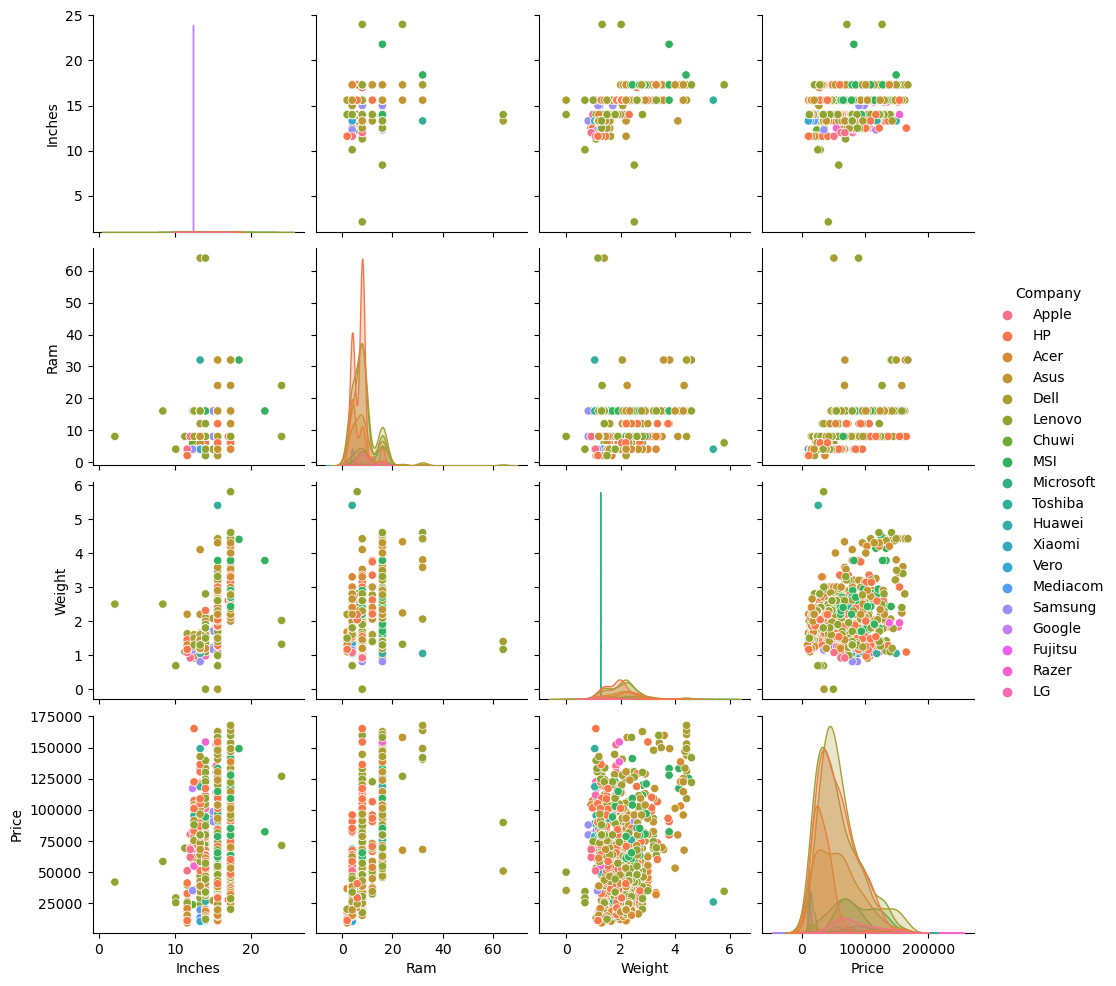

In [113]:
# Using pairplot to find the overall replationship between each columns

plt.figure(figsize=(10,8))
sns.pairplot(data = df,hue='Company')
plt.show()

__Inference__:

From this we can infer that the companies such as __Apple,HP,Acer,Asus,Lenovo,Dell__ having the __majority__ when it comes all of the whole.

## HeatMap

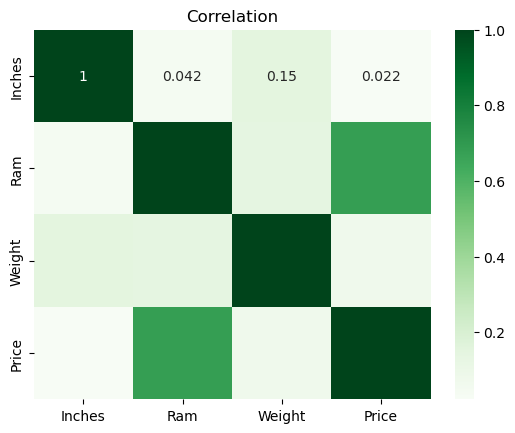

In [118]:
# Getting the highly correlated columns in the dataset

correlation = numeric_columns.corr()
sns.heatmap(correlation,annot=True,cmap='Greens')
plt.title('Correlation')
plt.show()

From this,we can say that the __Price and Ram__ are __highly correlated__.

# Visualization

## Line Plot

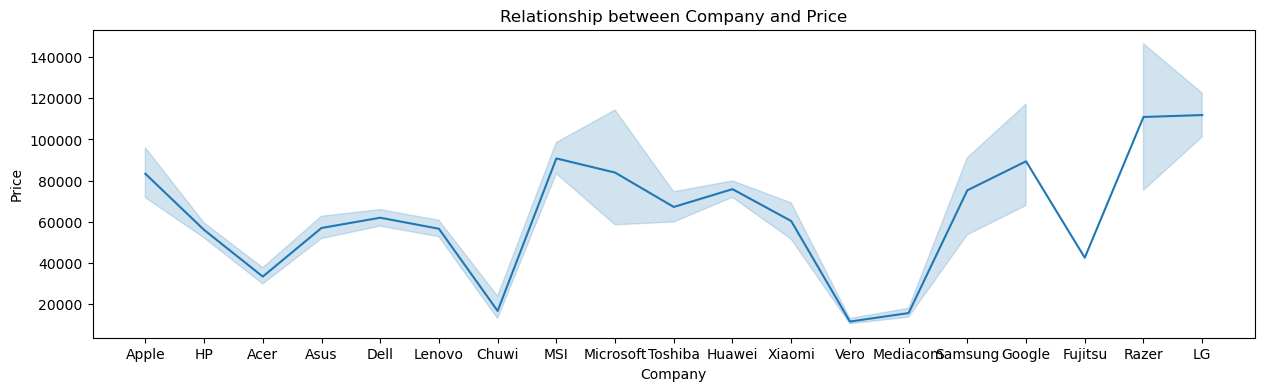

In [114]:
# Visualizing the 'Prices' of different companies

plt.figure(figsize=(15,4))
sns.lineplot(x='Company',y='Price',data=df)
plt.title('Relationship between Company and Price')
plt.xlabel('Company')
plt.ylabel('Price')
plt.show()

__Inference :__

From this visualization, we infer that the companies __'Appple','MSI','Samsung','Google','Razer'__ costs more than other Companies

## Scatter Plot

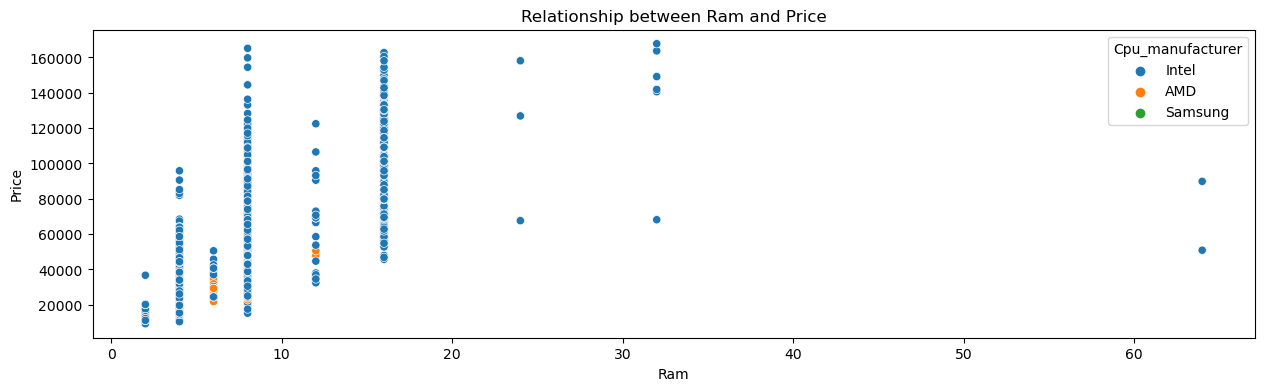

In [115]:
# Determining the relationship between 'Ram' and 'Price' of different Cpu manufacturers

plt.figure(figsize=(15,4))
sns.scatterplot(x='Ram',y='Price',data=df,hue='Cpu_manufacturer')
plt.title('Relationship between Ram and Price')
plt.xlabel('Ram')
plt.ylabel('Price')
plt.show()

From this, we infer that __Intel__ plays a significant role in many laptop models.

## Box Plot

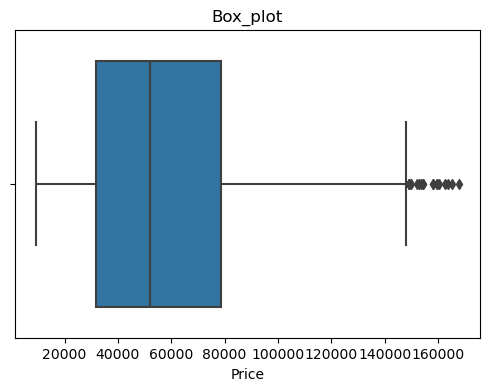

In [116]:
# Calculating the central tendency and Spread of variables in 'Price' column

plt.figure(figsize=(6,4))
sns.boxplot(x='Price',data=df)
plt.title('Box_plot')
plt.show()

It is known that the __cetral value__ of the dataset is around __50,000__ and also the most of the prices falls in the __range 30,000 to 80,000__ 

## Pie Chart

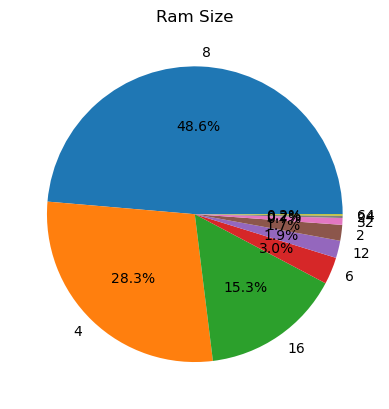

In [117]:
# Comparing the 'Ram' of whole datset

Ram_count = df['Ram'].value_counts()
plt.pie(x=Ram_count,labels=Ram_count.index,autopct='%1.1f%%')
plt.title('Ram Size')
plt.show()

From this, we are getting that __8GB Ram__ laptops holding the __large part__.